In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/city_day.csv")

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [7]:
# Filling missing values with the median
for col in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']:
    df[col] = df[col].fillna(df[col].median())
df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Moderate')

In [8]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


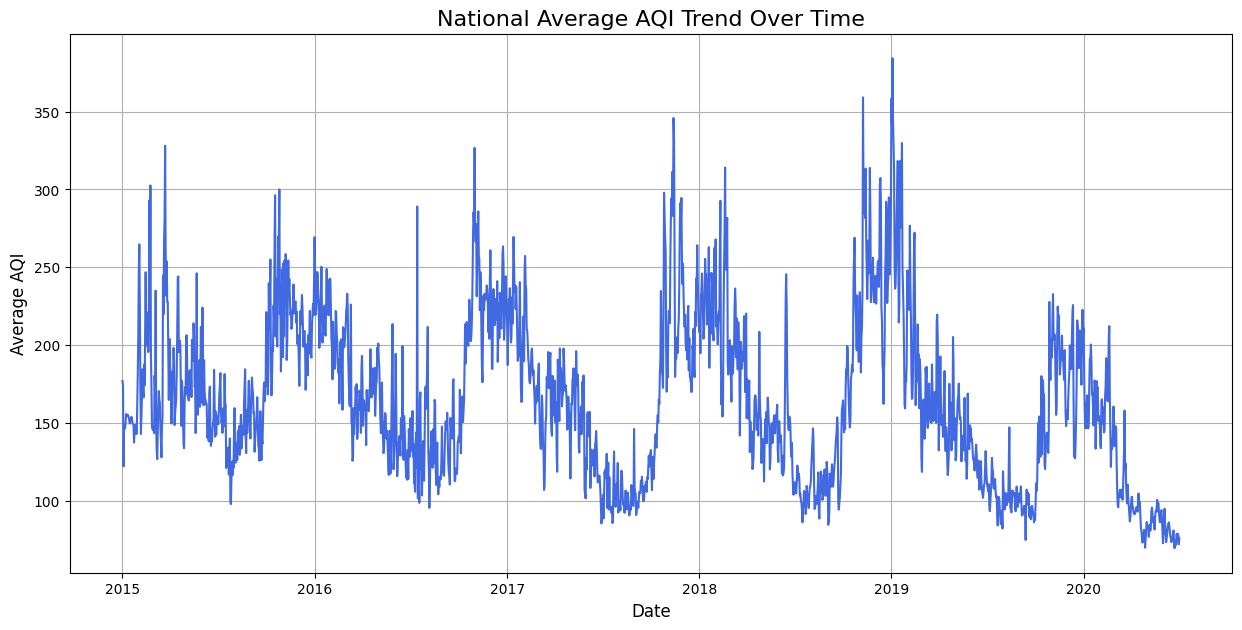

In [9]:
# 1. Overall AQI Trend in India
plt.figure(figsize=(15, 7))
df_grouped_date = df.groupby('Date')['AQI'].mean().reset_index()
sns.lineplot(x='Date', y='AQI', data=df_grouped_date, color='royalblue')
plt.title('National Average AQI Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.grid(True)
plt.show()

In [10]:
# 2. City-wise AQI Analysis (Top 5 most polluted cities)
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index
df_top_cities = df[df['City'].isin(top_cities)]

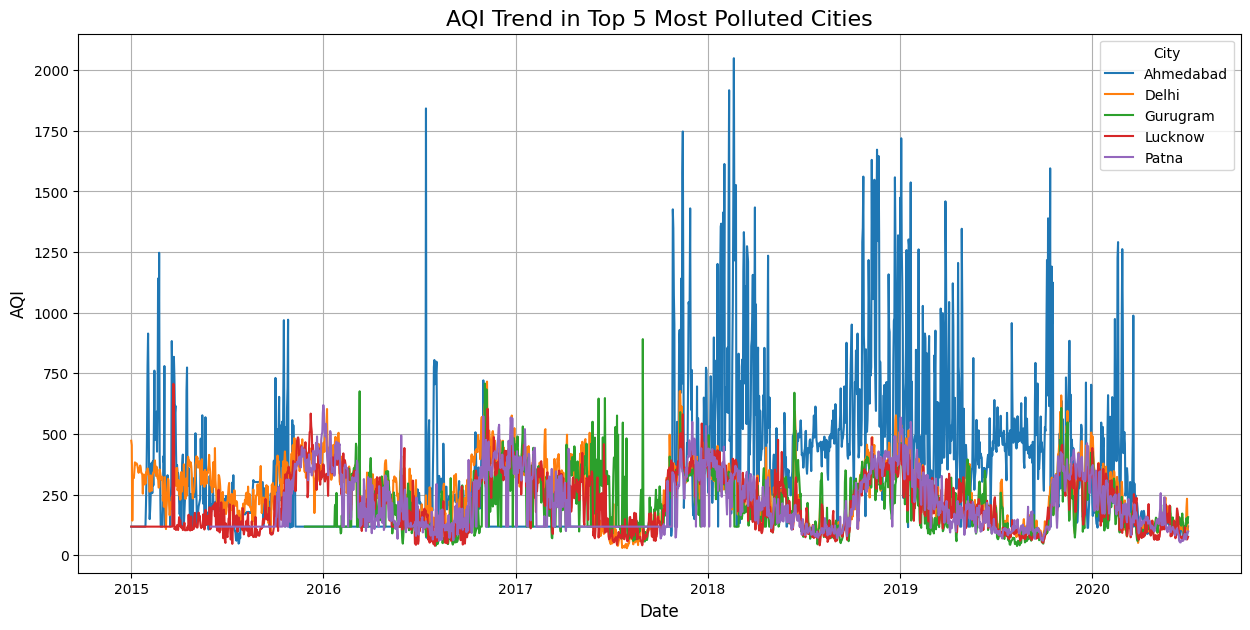

In [12]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='AQI', hue='City', data=df_top_cities)
plt.title('AQI Trend in Top 5 Most Polluted Cities', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.legend(title='City')
plt.grid(True)
plt.show()

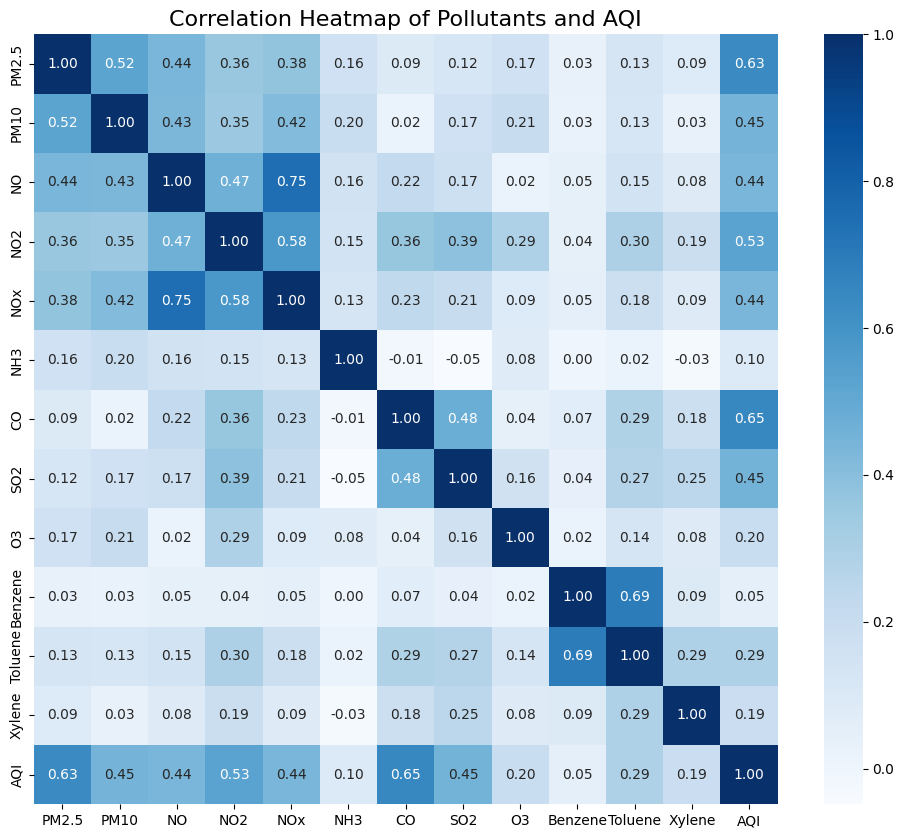

In [13]:
# 3. Pollutant Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].corr(),
            annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants and AQI', fontsize=16)
plt.show()

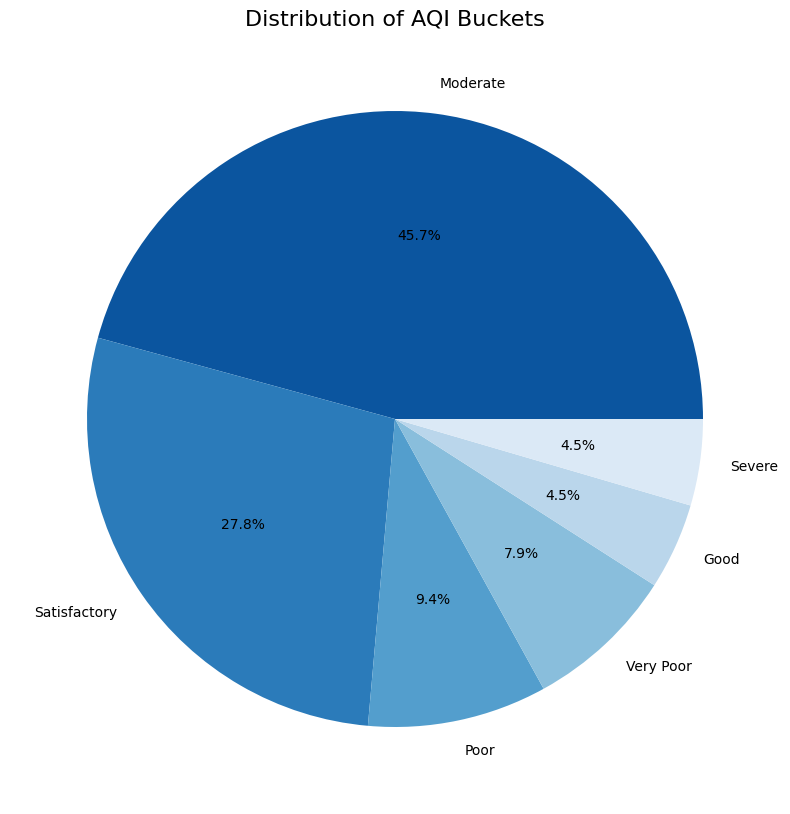

In [14]:
# 4. AQI Bucket Distribution
aqi_bucket_counts = df['AQI_Bucket'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('Blues_r', len(aqi_bucket_counts)))
plt.title('Distribution of AQI Buckets', fontsize=16)
plt.show()

/tmp/ipython-input-16-3219166399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQI_Bucket', y='City', data=bad_air_days_by_city.head(10), palette='Blues_r')


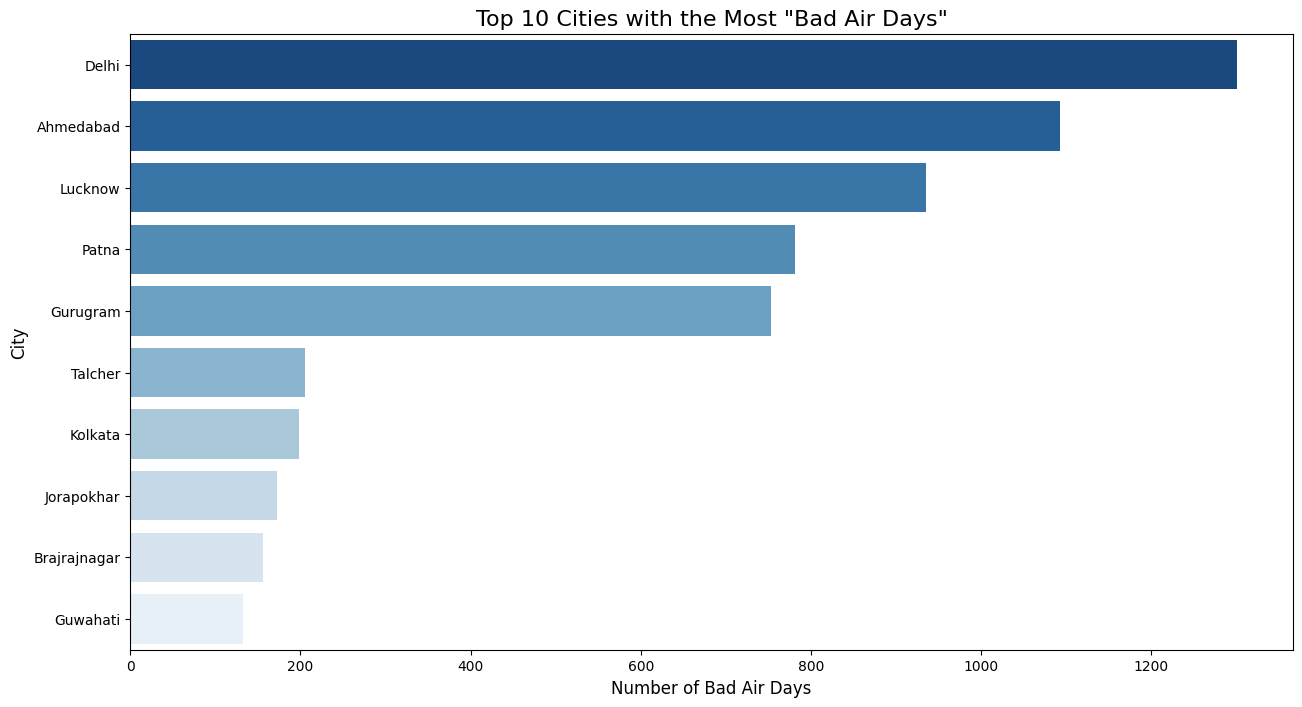

In [16]:
# 5."Bad Air Days" (Poor, Very Poor, and Severe)
bad_air_days = df[df['AQI_Bucket'].isin(['Poor', 'Very Poor', 'Severe'])]
bad_air_days_by_city = bad_air_days.groupby('City')['AQI_Bucket'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x='AQI_Bucket', y='City', data=bad_air_days_by_city.head(10), palette='Blues_r')
plt.title('Top 10 Cities with the Most "Bad Air Days"', fontsize=16)
plt.xlabel('Number of Bad Air Days', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

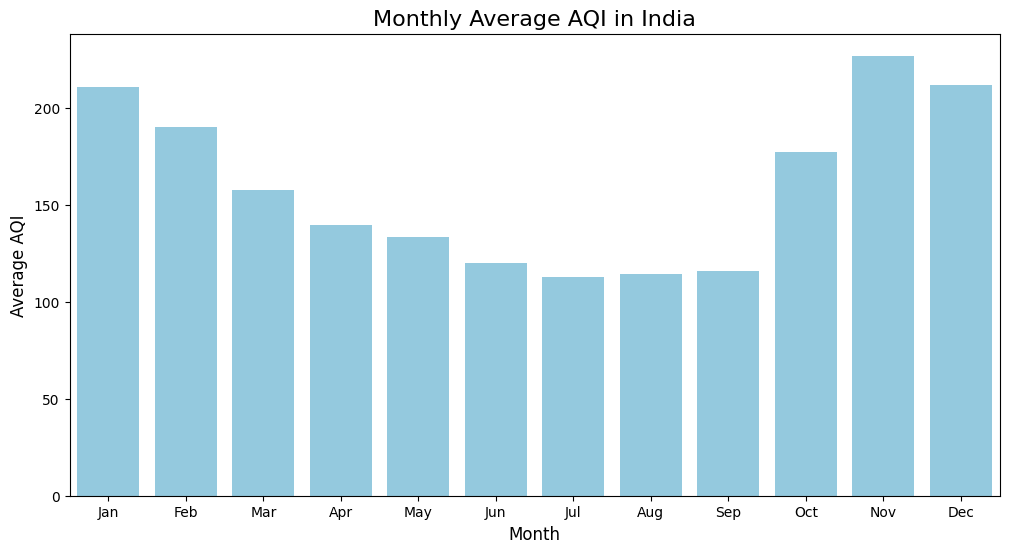

In [18]:
# 6. Monthly Average AQI
df['Month'] = df['Date'].dt.month
monthly_avg_aqi = df.groupby('Month')['AQI'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='AQI', data=monthly_avg_aqi, color='skyblue')
plt.title('Monthly Average AQI in India', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [19]:
# 7. Interactive Scatter plot of PM2.5 vs AQI with color-coded AQI Buckets
fig = px.scatter(df, x="PM2.5", y="AQI", color="AQI_Bucket",
                 title="PM2.5 vs. AQI by AQI Bucket",
                 color_discrete_sequence=px.colors.sequential.Blues_r)
fig.show()

In [20]:
# --- Clustering Analysis ---

# 8. K-Means Clustering of Cities based on Pollutants and AQI
city_avg = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']].mean().reset_index()


In [21]:
# Scale the data
scaler = StandardScaler()
city_avg_scaled = scaler.fit_transform(city_avg.iloc[:, 1:])

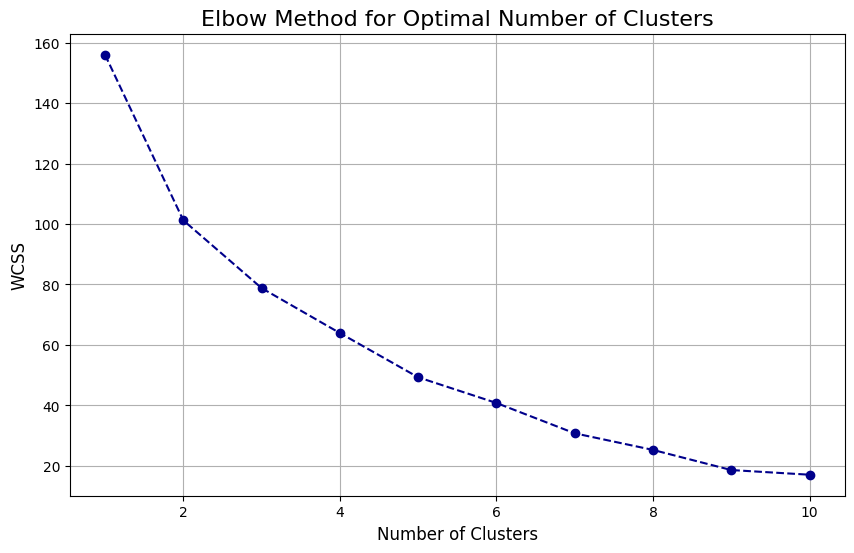

In [22]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(city_avg_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='darkblue')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True)
plt.show()

In [23]:
# Apply K-Means with the optimal number of clusters (let's assume it's 3 from the elbow plot)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
city_avg['Cluster'] = kmeans.fit_predict(city_avg_scaled)

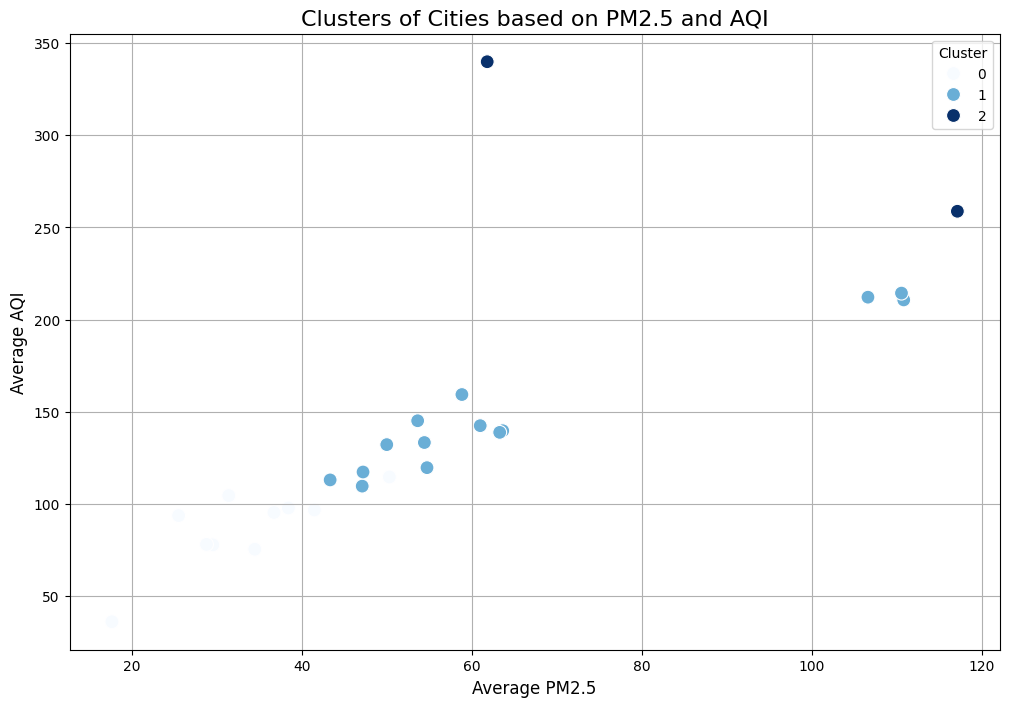

In [24]:
# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PM2.5', y='AQI', hue='Cluster', data=city_avg, palette='Blues', s=100)
plt.title('Clusters of Cities based on PM2.5 and AQI', fontsize=16)
plt.xlabel('Average PM2.5', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()